## Observations and Insights 

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#view data
#print(mouse_metadata.head())
#print(study_results.head())

#time data duplicate check
mouse_multi=[]
mouse_uniq=[]
mouse_multi = study_results['Mouse ID'].value_counts()
#print(mouse_multi)

#select only single item mice
mouse_single = mouse_multi.isin(["1"])
mouse_uniq=mouse_multi[mouse_single]
mouse_uniq=mouse_uniq.index
#print(mouse_uniq)

study_uniq1 = pd.DataFrame(columns=["Mouse ID","Timepoint","Tumor Volume (mm3)","Metastatic Sites"]) 
for mouse in mouse_uniq:
    study_uniq = study_results[study_results['Mouse ID'].str.contains(mouse)]
    study_uniq1=study_uniq1.append(study_uniq)
    #print(study_uniq)

#study_uniq1
                    
#Combine the data into a single dataset
single_time_merge = study_uniq1.merge(mouse_metadata, on='Mouse ID', how='inner')

# Display the data table for preview
single_time_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.0,0,Ketapril,Male,15,29
1,b447,0,45.0,0,Ceftamin,Male,2,30
2,n482,0,45.0,0,Propriva,Female,4,29
3,t573,0,45.0,0,Ceftamin,Female,15,27
4,h428,0,45.0,0,Ketapril,Female,1,27
5,o848,0,45.0,0,Stelasyn,Female,14,27
6,v199,0,45.0,0,Naftisol,Female,17,29
7,l872,0,45.0,0,Placebo,Male,19,30
8,x226,0,45.0,0,Ceftamin,Male,23,28
9,d133,0,45.0,0,Zoniferol,Male,5,30


In [70]:
# Checking the number of mice.
num_uniq=len(mouse_uniq)
print(f"number of single item mice: {num_uniq}")

number of single item mice: 12


In [71]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#select multi item mice
mouse_multi_item=[]
mouse_multi_item = ~mouse_multi.isin(["1"])
mouse_uniq_multi=mouse_multi[mouse_multi_item]
mouse_uniq_multi=mouse_uniq_multi.index
#print(mouse_uniq_multi)

#print(study_results.shape)

study_uniq2 = pd.DataFrame(columns=["Mouse ID","Timepoint","Tumor Volume (mm3)","Metastatic Sites"]) 
for mouse in mouse_uniq_multi:
    study_uniq = study_results[study_results['Mouse ID'].str.contains(mouse)]
    study_uniq2=study_uniq2.append(study_uniq)
    #print(study_uniq)

study_uniq2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
...,...,...,...,...
328,n630,5,46.099100,0
108,z314,0,45.000000,0
361,z314,5,45.934712,0
204,w746,0,45.000000,0


In [72]:
# Optional: Get all the data for the duplicate mouse ID. 
#Combine the data into a single dataset
multi_time_merge = study_uniq2.merge(mouse_metadata, on='Mouse ID', how='inner')

multi_time_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,g989,0,45.000000,0,Propriva,Female,21,26
1,g989,0,45.000000,0,Propriva,Female,21,26
2,g989,5,48.786801,0,Propriva,Female,21,26
3,g989,5,47.570392,0,Propriva,Female,21,26
4,g989,10,51.745156,0,Propriva,Female,21,26
...,...,...,...,...,...,...,...,...
1876,n630,5,46.099100,0,Propriva,Female,15,29
1877,z314,0,45.000000,0,Stelasyn,Female,21,28
1878,z314,5,45.934712,0,Stelasyn,Female,21,28
1879,w746,0,45.000000,0,Propriva,Male,1,26


In [73]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#remove duplicate mouse and time entries
multi_time_merge.sort_values(['Mouse ID', 'Timepoint'], ascending=[True, True], inplace=True)
#multi_time_merge
multi_time_merge.drop_duplicates(['Mouse ID', 'Timepoint'], keep='first')

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
533,a203,0,45.000000,0,Infubinol,Female,20,23
534,a203,5,48.508468,0,Infubinol,Female,20,23
535,a203,10,51.852437,1,Infubinol,Female,20,23
536,a203,15,52.777870,1,Infubinol,Female,20,23
537,a203,20,55.173336,1,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...
158,z969,25,63.145652,2,Naftisol,Male,9,30
159,z969,30,65.841013,3,Naftisol,Male,9,30
160,z969,35,69.176246,4,Naftisol,Male,9,30
161,z969,40,70.314904,4,Naftisol,Male,9,30


In [74]:
# Checking the number of mice in the clean DataFrame.
num_dup_mice = len(mouse_uniq_multi)
print(f"Number of mice with multiple time entries: {num_dup_mice}")

Number of mice with multiple time entries: 237


## Summary Statistics

In [75]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
#using multi time mice only

drug_regimen_groupby = multi_time_merge.groupby(["Drug Regimen"])
drug_regimen_mean = drug_regimen_groupby.mean("Tumor Volume (mm3)")
drug_reg_mean = drug_regimen_mean["Tumor Volume (mm3)"].tolist()
list_of_drug_reg = drug_regimen_mean.index.tolist()
#list_of_drug_reg
#drug_reg_mean
drug_regimen_median = drug_regimen_groupby.median("Tumor Volume (mm3)")
drug_reg_median = drug_regimen_median["Tumor Volume (mm3)"].tolist()
#drug_reg_median
drug_regimen_var = drug_regimen_groupby.var()
drug_reg_var = drug_regimen_var["Tumor Volume (mm3)"].tolist()
#drug_reg_var
drug_regimen_std = drug_regimen_groupby.std()
drug_reg_std = drug_regimen_std["Tumor Volume (mm3)"].tolist()
#drug_reg_std
drug_regimen_sem = drug_regimen_groupby.sem()
drug_reg_sem = drug_regimen_sem["Tumor Volume (mm3)"].tolist()
#drug_reg_sem

summary_tumor=pd.DataFrame({"Drug Regime":list_of_drug_reg,
                  "Mean":drug_reg_mean,
                  "Median":drug_reg_median,
                  "Variance":drug_reg_var,
                  "Standard Deviation":drug_reg_std,
                  "SEM":drug_reg_sem
              })
summary_tumor= summary_tumor.round(4)
summary_tumor

,Drug Regime,Mean,Median,Variance,Standard Deviation,SEM
0,Capomulin,40.6757,41.5578,24.9478,4.9948,0.3293
1,Ceftamin,52.7657,51.9102,38.8356,6.2318,0.4724
2,Infubinol,52.8848,51.8206,43.1287,6.5672,0.4922
3,Ketapril,55.3457,53.7396,68.1499,8.2553,0.6053
4,Naftisol,54.4330,52.5449,65.9347,8.1200,0.5986
5,Placebo,54.0838,52.3160,61.0514,7.8135,0.5824
6,Propriva,52.3683,50.9100,42.2781,6.5022,0.5140
7,Ramicane,40.2167,40.6732,23.4867,4.8463,0.3210
8,Stelasyn,54.2844,52.4882,59.3038,7.7009,0.5740
9,Zoniferol,53.2820,51.8266,48.4240,6.9587,0.5172


In [76]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_tumor_agg = drug_regimen_groupby["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
summary_tumor_agg=summary_tumor_agg.round(4)
summary_tumor_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.6757,41.5578,24.9478,4.9948,0.3293
Ceftamin,52.7657,51.9102,38.8356,6.2318,0.4724
Infubinol,52.8848,51.8206,43.1287,6.5672,0.4922
Ketapril,55.3457,53.7396,68.1499,8.2553,0.6053
Naftisol,54.4330,52.5449,65.9347,8.1200,0.5986
Placebo,54.0838,52.3160,61.0514,7.8135,0.5824
Propriva,52.3683,50.9100,42.2781,6.5022,0.5140
Ramicane,40.2167,40.6732,23.4867,4.8463,0.3210
Stelasyn,54.2844,52.4882,59.3038,7.7009,0.5740


## Bar and Pie Charts

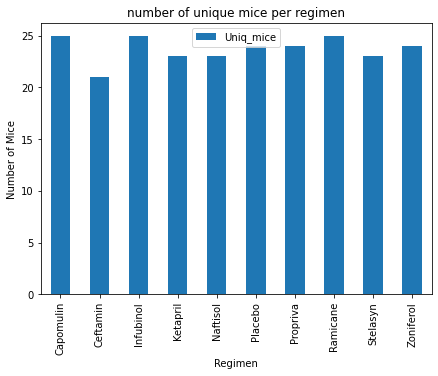

In [77]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_reg_uniq_mice = drug_regimen_groupby["Mouse ID"].nunique().tolist()
drug_reg_uniq_mice_df = pd.DataFrame({"Uniq_mice":drug_reg_uniq_mice},
                                     index=list_of_drug_reg)
#drug_reg_uniq_mice_df
plot = drug_reg_uniq_mice_df.plot.bar(y="Uniq_mice", figsize=(7, 5), title="number of unique mice per regimen",
                                    xlabel="Regimen", ylabel="Number of Mice")
#plt.legend(bbox_to_anchor=(1.0, 1.0))

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.



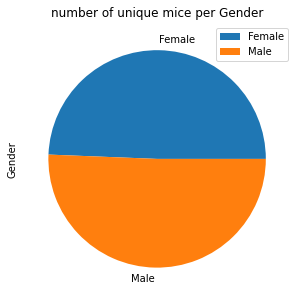

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_groupby = multi_time_merge.groupby(["Sex"])
gender_count = gender_groupby["Mouse ID"].nunique().tolist()
gender_count_df = pd.DataFrame({"Gender":gender_count},
                               index=["Female","Male"])
#gender_count_df

plot1 = gender_count_df.plot.pie(y="Gender", figsize=(7, 5), title="number of unique mice per Gender")

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
